# Boston Housing Data Analysis

## Project Scenario
As a Data Scientist with a housing agency in Boston MA, you have been given access to a dataset on housing prices 
derived from the U.S. Census Service. The goal is to present insights to upper management.

This analysis addresses:
- **Is there a significant difference in the median value of houses bounded by the Charles river?**
- **Is there a difference in median values of houses based on the proportion of owner-occupied units built before 1940?**
- **Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?**
- **What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?**

## Dataset Description
The dataset contains the following variables:
- `CRIM`: per capita crime rate by town
- `ZN`: proportion of residential land zoned for large lots
- `INDUS`: proportion of non-retail business acres per town
- `CHAS`: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- `NOX`: nitric oxides concentration
- `RM`: average number of rooms per dwelling
- `AGE`: proportion of owner-occupied units built before 1940
- `DIS`: weighted distances to five Boston employment centres
- `RAD`: accessibility to radial highways
- `TAX`: full-value property-tax rate
- `PTRATIO`: pupil-teacher ratio
- `LSTAT`: % lower status of the population
- `MEDV`: Median value of owner-occupied homes



In [1]:
# Install necessary packages (uncomment if running in a new environment)
!pip install pandas numpy matplotlib seaborn scipy statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 131.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 132.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 117.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 138.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 51.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv")

# Display basic information about the dataset
df.info()

# Display the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Exploratory Data Analysis

Before running any statistical tests, let's analyze the dataset using descriptive statistics and visualizations.


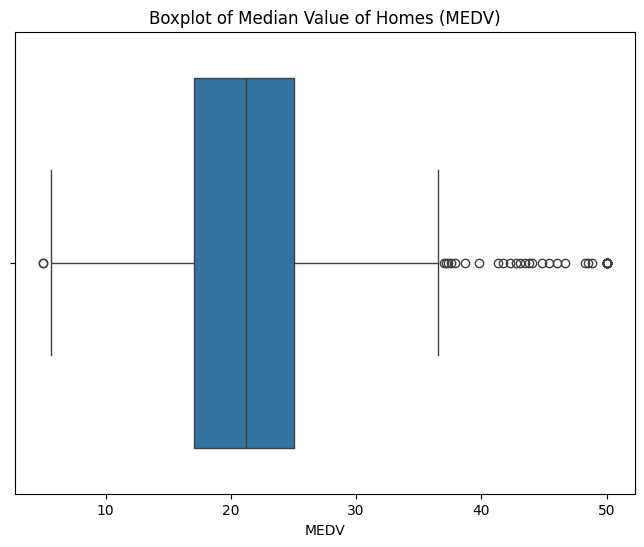

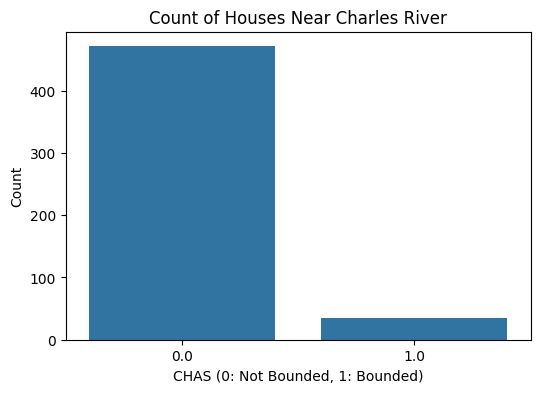

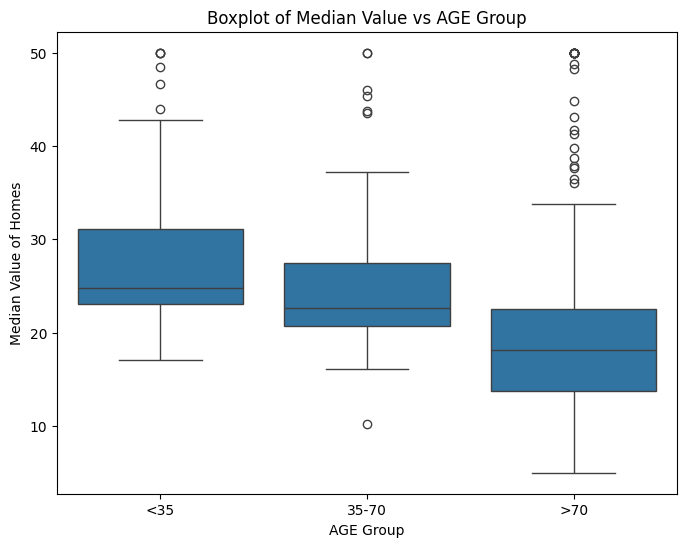

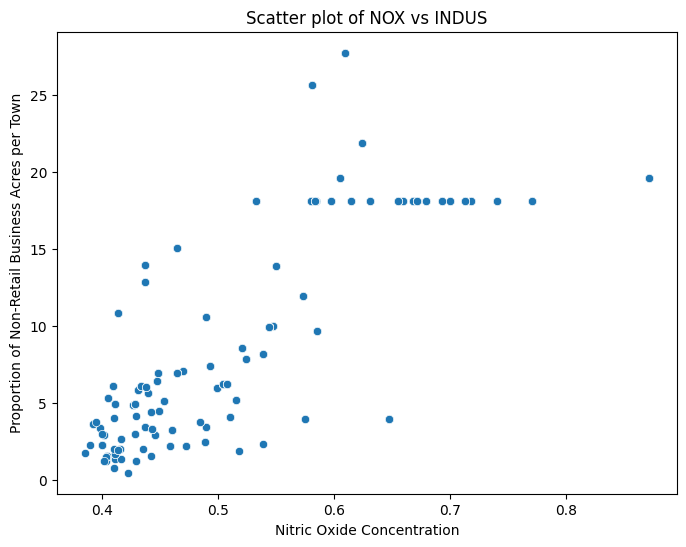

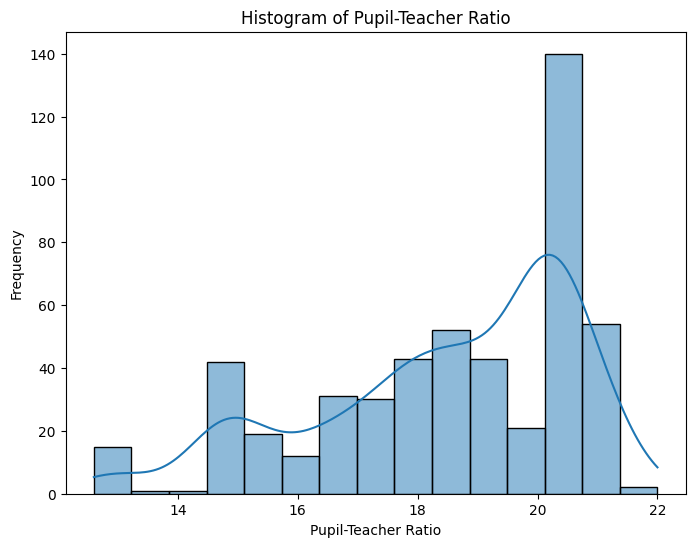

In [4]:
# Summary statistics
df.describe()

# Boxplot for MEDV (median value of owner-occupied homes)
plt.figure(figsize=(8,6))
sns.boxplot(x=df["MEDV"])
plt.title("Boxplot of Median Value of Homes (MEDV)")
plt.show()

# Bar plot for CHAS (Charles River variable)
plt.figure(figsize=(6,4))
sns.countplot(x=df["CHAS"])
plt.title("Count of Houses Near Charles River")
plt.xlabel("CHAS (0: Not Bounded, 1: Bounded)")
plt.ylabel("Count")
plt.show()

# Boxplot of MEDV vs AGE groups
df['AGE_Group'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['<35', '35-70', '>70'])
plt.figure(figsize=(8,6))
sns.boxplot(x=df['AGE_Group'], y=df['MEDV'])
plt.title("Boxplot of Median Value vs AGE Group")
plt.xlabel("AGE Group")
plt.ylabel("Median Value of Homes")
plt.show()

# Scatter plot for NOX vs INDUS
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["NOX"], y=df["INDUS"])
plt.title("Scatter plot of NOX vs INDUS")
plt.xlabel("Nitric Oxide Concentration")
plt.ylabel("Proportion of Non-Retail Business Acres per Town")
plt.show()

# Histogram for PTRATIO (Pupil-Teacher Ratio)
plt.figure(figsize=(8,6))
sns.histplot(df["PTRATIO"], bins=15, kde=True)
plt.title("Histogram of Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()


## Statistical Tests

Let's perform statistical tests to answer the key management questions.


In [9]:
# Perform T-test (CHAS vs. MEDV)
t_stat, p_value_ttest = stats.ttest_ind(df[df["CHAS"] == 0]["MEDV"], df[df["CHAS"] == 1]["MEDV"])
conclusion_ttest = f"p-value is {p_value_ttest:.4f} and there {'is' if p_value_ttest < 0.05 else 'is not'} a significant difference in median values between houses near and not near the river."
print("T-Test Conclusion:", conclusion_ttest)

# Perform ANOVA Test (AGE groups vs. MEDV)
# Ensure the AGE_Group column is created properly
df['AGE_Group'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['<35', '35-70', '>70'])

# Verify the new column
print(df[['AGE', 'AGE_Group']].head())

anova_results = ols('MEDV ~ C(AGE_Group)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_results, typ=2)
p_val_anova = anova_table["PR(>F)"].iloc[0]

conclusion_anova = f"p-value is {p_val_anova:.4f} and there {'is' if p_val_anova < 0.05 else 'is not'} a significant difference in median values of houses based on the proportion of owner-occupied units built before 1940."
print("ANOVA Conclusion:", conclusion_anova)

# Perform Pearson Correlation (NOX vs INDUS)
correlation, p_value_corr = stats.pearsonr(df["NOX"], df["INDUS"])
conclusion_corr = f"p-value is {p_value_corr:.4f} and there {'is' if p_value_corr < 0.05 else 'is not'} a significant relationship between nitric oxide concentration and the proportion of non-retail business acres per town."
print("Pearson Correlation Conclusion:", conclusion_corr)

# Perform Regression Analysis (DIS vs. MEDV)
X = sm.add_constant(df[["DIS"]])
y = df["MEDV"]

model = sm.OLS(y, X).fit()

p_value_regression = model.pvalues["DIS"]
conclusion_regression = f"p-value is {p_value_regression:.4f} and there {'is' if p_value_regression < 0.05 else 'is not'} a significant impact of an additional weighted distance to employment centers on the median value of owner-occupied homes."
print("Regression Analysis Conclusion:", conclusion_regression)

print(model.summary())


T-Test Conclusion: p-value is 0.0001 and there is a significant difference in median values between houses near and not near the river.
    AGE AGE_Group
0  65.2     35-70
1  78.9       >70
2  61.1     35-70
3  45.8     35-70
4  54.2     35-70
ANOVA Conclusion: p-value is 0.0000 and there is a significant difference in median values of houses based on the proportion of owner-occupied units built before 1940.
Pearson Correlation Conclusion: p-value is 0.0000 and there is a significant relationship between nitric oxide concentration and the proportion of non-retail business acres per town.
Regression Analysis Conclusion: p-value is 0.0000 and there is a significant impact of an additional weighted distance to employment centers on the median value of owner-occupied homes.
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:      

## Hypothesis Testing

We perform the following statistical tests:

1. **T-Test for Independent Samples** (CHAS vs. MEDV)  
   - **H₀:** There is no significant difference in median house values between houses near and not near the river.  
   - **H₁:** There is a significant difference in median house values between houses near and not near the river.  

2. **ANOVA Test** (AGE groups vs. MEDV)  
   - **H₀:** There is no difference in median house values based on the proportion of owner-occupied units built before 1940.  
   - **H₁:** There is a difference in median house values based on the proportion of owner-occupied units built before 1940.  

3. **Pearson Correlation** (NOX vs. INDUS)  
   - **H₀:** There is no relationship between nitric oxide concentration and the proportion of non-retail business acres per town.  
   - **H₁:** There is a relationship between nitric oxide concentration and the proportion of non-retail business acres per town.  

4. **Regression Analysis** (DIS vs. MEDV)  
   - **H₀:** There is no significant impact of distance to employment centers on median house value.  
   - **H₁:** There is a significant impact of distance to employment centers on median house value.  


## Conclusion

### **1. T-Test (Charles River vs. Not)**  
- **p-value = 0.0001**  
- **Conclusion:** There **is** a significant difference in median values between houses near and not near the river.

### **2. ANOVA (AGE Groups vs. MEDV)**  
- **p-value = 0.0000**  
- **Conclusion:** There **is** a significant difference in median values of houses based on the proportion of owner-occupied units built before 1940.

### **3. Pearson Correlation (NOX vs. INDUS)**  
- **p-value = 0.0000**  
- **Conclusion:** There **is** a significant relationship between nitric oxide concentration and the proportion of non-retail business acres per town.

### **4. Regression Analysis (DIS vs. MEDV)**  
- **p-value = 0.0000**  
- **Conclusion:** There **is** a significant impact of an additional weighted distance to employment centers on the median value of owner-occupied homes.

Based on these findings, we observe that all tested variables show statistically significant differences or relationships.
